#**Introduction**

This project implements a three-layer deep neural network from scratch using Python and NumPy to recognize handwritten digits from the renowned MNIST dataset. A miniature version of the dataset was used for this project, consisting of 1000 training images and 350 test images. The labels are one-hot encoded, and all files are in CSV format. All images are handwritten and are 28x28 pixels.

The goal was to train a model that accurately classifies these images into their corresponding digit categories (0-9). The project explores the fundamental concepts of neural networks, encompassing forward propagation, backpropagation, gradient descent, and activation functions like ReLU and softmax. Provisions were made for using the tanh activation function in the code, but this function was not used in the final iteration as ReLU yielded better results.

This project meticulously details each step of the process, from loading and preprocessing the data to training, evaluating, and visualizing the model's performance. Through illustrative plots and metrics like accuracy, the network's ability to learn from data and make reliable predictions on unseen examples is demonstrated.

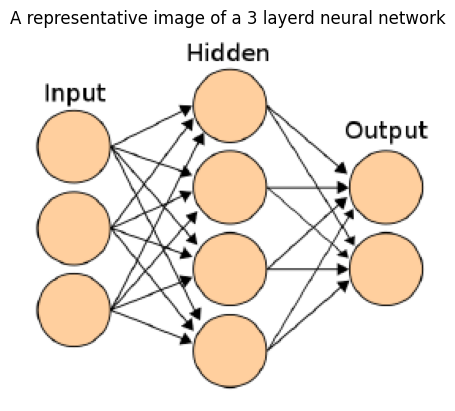

In [ ]:
import cv2
image = cv2.imread("/content/A-3-layer-neural-network-with-3-inputs-4-hidden-nodes-and-2-outputs-Image-courtesy-of.png")
image_convert = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("A representative image of a 3 layerd neural network")
plt.axis("off")
plt.imshow(image_convert)
plt.show()

#**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

#**Loading the Dataset**

In [ ]:
# Load the training data:
X_train = np.loadtxt('/content/train_X.csv', delimiter = ',').T  # Training features (transpose for shape compatibility)
Y_train = np.loadtxt('/content/train_label.csv', delimiter = ',').T # Training labels (one-hot encoded, transpose for shape compatibility)

# Load the test data:
X_test = np.loadtxt('/content/test_X.csv', delimiter = ',').T   # Test features (transpose for shape compatibility)
Y_test = np.loadtxt('/content/test_label.csv', delimiter = ',').T  # Test labels (one-hot encoded, transpose for shape compatibility)

#**Checking Shape**

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print('Shape of Y_tets:', Y_test.shape)

Shape of X_train: (784, 1000)
Shape of Y_train: (10, 1000)
Shape of X_test: (784, 350)
Shape of Y_tets: (10, 350)


#**Printing Random Images**

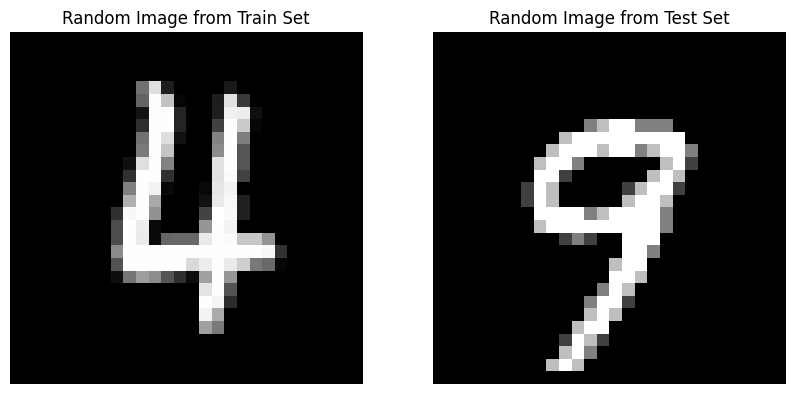

In [ ]:
# Choosing two random index values each from test and train
index1 = random.randrange(0, X_train.shape[1])
index2 = random.randrange(0, X_test.shape[1])

# Printing the images side by side
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title("Random Image from Train Set")
plt.axis('off')
plt.imshow(X_train[:, index1].reshape(28,28), cmap = 'gray')

plt.subplot(1,2,2)
plt.title("Random Image from Test Set")
plt.axis('off')
plt.imshow(X_test[:, index2].reshape(28,28), cmap = 'gray')

plt.show()

# **Defining the Activation Functions**

* **tanh (Hyperbolic Tangent)**
   * $tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

* **ReLU (Rectified Linear Unit)**
   * $ReLU(z) = \max(0, z)$

* **Softmax**
   * $softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^N e^{z_j}}$ (for each output neuron `i` in a layer with `N` neurons)

In [ ]:
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(x, 0)

def softmax(X):
  expX = np.exp(X)
  return expX/np.sum(expX, axis = 0)

# **Derivatives of the Activation Functions**

* **Derivative of tanh**
  * $tanh'(z) = 1 - tanh^2(z)$

* **Derivative of ReLU**
  *  $ReLU'(z) =$

  $$\begin{cases}
  1, &  \text{if } z > 0 \\
  0, &  \text{if } z \leq 0
\end{cases}$$

In [ ]:
def derivation_tanh(x):
  return (1-np.power(np.tan(x), 2))

def derivation_relu(x):
  return np.array(x > 0, dtype = np.float32)

# **Initialize the Parameters**



In [ ]:
def initialise_parameters(n_x, n_h, n_y):
  w1 = np.random.randn(n_h, n_x) * 0.001
  b1 = np.zeros((n_h, 1))

  w2 = np.random.randn(n_y, n_h) * 0.001
  b2 = np.zeros((n_y, 1))

  parameters = {
      'w1': w1,
      'b1': b1,
      'w2': w2,
      'b2': b2
  }

  return parameters

# **Forward Propagation**

* $z_1 = w_1 \cdot x + b_1$
* $z_2 = w_2 \cdot a_1 + b_2$
* $a_1 = ReLU(z_1)$
* $a_2 = softmax(z_2)$

In [ ]:
def forward_propagation(x, parameters):

  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  z1 = np.dot(w1, x) + b1
  a1 = relu (z1)

  z2 = np.dot(w2, a1) + b2
  a2 = softmax(z2)

  forward_cache = {
      'z1':z1,
      'a1':a1,
      'z2':z2,
      'a2':a2
  }

  return forward_cache

## **Multi-Class Cross-Entropy Loss Function**

*  $C = -\frac{1}{m} \sum_{i=1}^m \sum_{j=1}^N y_{ij} \log(\hat{y}_{ij})$

   * **Where:**
      *  `m` is the number of training examples.
      *  `N` is the number of classes.
      *  $y_{ij}$ is 1 if the i-th example belongs to class j, and 0 otherwise (one-hot encoded target).
      *  $\hat{y}_{ij}$ is the predicted probability of the i-th example belonging to class j (output of the softmax).

In [ ]:
def cost_function(a2, y):
  m = y.shape[1]

  cost = -(1/m)*np.sum(np.multiply(y, np.log(a2)))  # Use np.multiply for element-wise multiplication

  return cost

#**Backward Propagation**

$dZ_2 = (A_2 - Y)$

$dW_2 = \frac{1}{m} \cdot dZ_2 \cdot A_1^T$

$dB_2 = \frac{1}{m} \cdot \text{sum}(dZ_2, 1)$

$dZ_1 = W_2^T \cdot dZ_2 * f_1' (Z_1)$

$dW_1 = \frac{1}{m} \cdot dZ_1 \cdot X^T$

$dB_1 = \frac{1}{m} \cdot \text{sum}(dZ_1, 1)$




In [ ]:
def backward_prop(x, y, parameters, forward_cache):

  w1 = parameters['w1']
  w2 = parameters['w2']
  b1 = parameters['b1']
  b2 = parameters['b2']

  a1 = forward_cache['a1']
  a2 = forward_cache['a2']
  z1 = forward_cache['z1']
  z2 = forward_cache['z2']

  m = x.shape[1] # Number of training examples

  # Backpropagation calculations

  # Output layer gradients
  dz2 = (a2 - y) # Derivative of loss w.r.t. output layer linear combination
  dw2 = (1/m) * np.dot(dz2, a1.T) # Gradient of loss w.r.t. weights in layer 2
  db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True) # Gradient of loss w.r.t. biases in layer 2

  # Hidden layer gradients
  dz1 = np.dot(w2.T, dz2) * derivation_relu(z1) # Derivative of loss w.r.t. hidden layer linear combination
  dw1 = (1/m) * np.dot(dz1, x.T) # Gradient of loss w.r.t. weights in layer 1
  db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True) # Gradient of loss w.r.t. biases in layer 1

  # Store gradients in a dictionary
  gradients = {
      'dw2':dw2,
      'db2':db2,
      'dw1':dw1,
      'db1':db1
  }

  return gradients

# **Update the Parameters**

$w_2 = w_2 - \alpha * \frac{dC}{dw_2}$

$b_2 = b_2 - \alpha * \frac{dC}{db_2}$

$w_1 = w_1 - \alpha * \frac{dC}{dw_1}$

$b_1 = b_1 - \alpha * \frac{dC}{db_1}$

In [ ]:
def update_parameters(parameters, gradients, learning_rate):

  # Retrieve parameters
  w1 = parameters['w1']
  w2 = parameters['w2']
  b1 = parameters['b1']
  b2 = parameters['b2']

  # Retrieve gradients
  dw1 = gradients['dw1']
  dw2 = gradients['dw2']
  db1 = gradients['db1']
  db2 = gradients['db2']

  # Update parameters using gradient descent:
  w1 = w1 - learning_rate * dw1
  b1 = b1 - learning_rate * db1

  w2 = w2 - learning_rate * dw2
  b2 = b2 - learning_rate * db2

  # Store updated parameters in the dictionary
  parameters = {
      'w1': w1,
      'b1': b1,
      'w2': w2,
      'b2': b2
  }

  return parameters

#**Implementation of the Code**

In [ ]:
def model(x, y, n_h, learning_rate, epoch):

  # Get dimensions of the input and output layers
  n_x = x.shape[0]  # Number of features (input layer size)
  n_y = y.shape[0]  # Number of classes (output layer size)

  # Initialize a list to store the cost at specified intervals
  cost_list = []

  # Initialize the model parameters
  parameters = initialise_parameters(n_x, n_h, n_y)

  # Training loop
  for i in range(epoch):

    # 1. Forward Propagation: Calculate predictions
    forward_cache = forward_propagation(x, parameters)

    # 2. Calculate the cost (cross-entropy loss)
    cost = cost_function(forward_cache['a2'], y)

    # 3. Backward Propagation: Calculate gradients
    gradients = backward_prop(x, y, parameters, forward_cache)

    # 4. Update Parameters (Gradient Descent)
    parameters = update_parameters(parameters, gradients, learning_rate)

    # Store cost at specified intervals
    cost_list.append(cost)

    # Print the cost at specified intervals for monitoring progress
    if (i % (epoch / 10) == 0):
      print("Cost after", i, "iterations is:", cost)

  # Return the trained parameters and the list of recorded costs
  return parameters, cost_list

# **Implementing the Training Loop**

* ### ***Setting Hyperparameters***
- iterations = 500        (Number of training iterations)
* n_h = 1000             (Number of hidden units in the hidden layer)
* learning_rate = 0.002   (Learning rate for gradient descent)

* ### ***Train the Model***
* Parameters, Cost_list = model(X_train, Y_train, n_h=n_h, iterations=iterations, learning_rate=learning_rate)

In [ ]:
# Hyperparameters
epoch = 500
n_h = 1000
learning_rate = 0.002

# Model Training
Parameters , Cost_list = model (X_train, Y_train, n_h = n_h, epoch = epoch, learning_rate = learning_rate )

Cost after 0 iterations is: 2.309889534998434
Cost after 50 iterations is: 0.2640662330448841
Cost after 100 iterations is: 0.10786740681848833
Cost after 150 iterations is: 0.05415961076751789
Cost after 200 iterations is: 0.03227120380533015
Cost after 250 iterations is: 0.02187273323715612
Cost after 300 iterations is: 0.01613425253539233
Cost after 350 iterations is: 0.012591979287342982
Cost after 400 iterations is: 0.010225804355823974
Cost after 450 iterations is: 0.00855050783023612


#**Cost Function Plot**

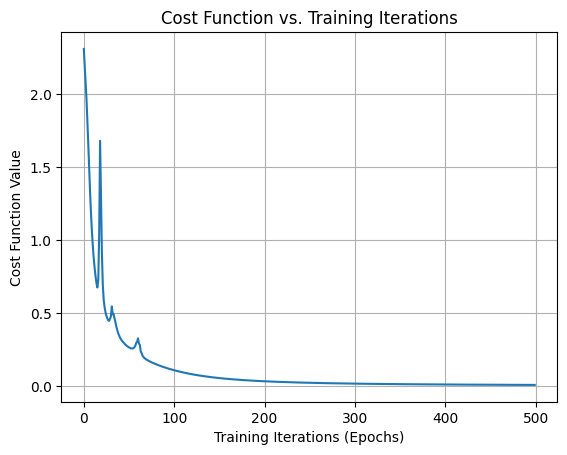

In [ ]:
# Plot the cost function over training iterations:
t = np.arange(0, epoch)
plt.plot(t, Cost_list)
plt.xlabel("Training Iterations (Epochs)")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs. Training Iterations")
plt.grid(True)
plt.show()

#**Calculating Accuracy on Training and Test Sets**

In [ ]:
def get_accuracy(parameters, X, Y):

  # Perform forward propagation to get model predictions
  forward_cache = forward_propagation(X, parameters)
  a2 = forward_cache['a2']

  # Convert one-hot encoded predictions and true labels to class indices
  predicted_labels = np.argmax(a2, axis=0)
  true_labels = np.argmax(Y, axis=0)

  # Calculate the number of correct predictions
  correct_predictions = np.sum(predicted_labels == true_labels)
  total_predictions = Y.shape[1]

  # Calculate and return the accuracy
  accuracy = correct_predictions / total_predictions
  return accuracy

#**Calculating Accuracy on Training and Test Sets**

In [ ]:
# Calculate and print the training accuracy:
train_accuracy = get_accuracy(Parameters, X_train, Y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate and print the test accuracy:
test_accuracy = get_accuracy(Parameters, X_test, Y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Test Accuracy: 88.29%


#**Random Image Prediction**

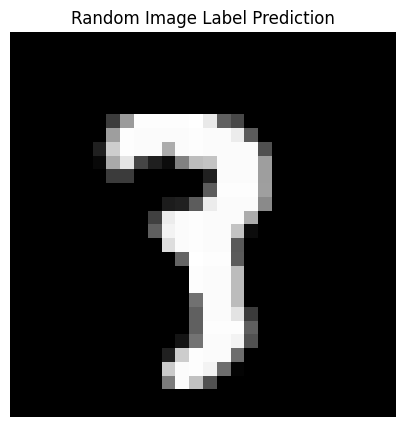

The true label for this image is 3
The predicted label for this image is 3


In [ ]:
# Choose the index of a random image from the test set
random_index = random.randrange(0, X_test.shape[1]-1)

# Actual Image
image = X_test[:, random_index].reshape(28,28)
true_label_index = np.argmax(Y_test[:, random_index])

# Prediction of label by the model
forward_cache = forward_propagation(image.reshape(784,1), Parameters)

# Finding the max value from the output of the last layer
max_value = np.argmax(forward_cache['a2'])

# Printing the image and the result
plt.figure(figsize=(10,5))
plt.title("Random Image Label Prediction")
plt.axis('off')
plt.imshow(image, cmap = 'gray')
plt.show()

print(f"The true label for this image is {true_label_index}")
print(f"The predicted label for this image is {max_value}")